Este análisis busca complementar el enfoque exploratorio del estudio sobre osteosarcopenia, incorcoprando pruebas de estadístia inferencial para validar patrones observados entre grupos y variables seleccionadas, sin emitir juicios clínicos.

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, shapiro, levene, kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
# carga
df = pd.read_csv('../data/cleaned/df_eda.csv')

## Objetivo 1. Osteosarcopenia vs Edad
**Definición:** El objetivo es evauluar si existe una diferencia estadísticamente sifnificativa en la edad de los pacientes según la presencia o ausencia de osteosarcopenia.  

Se aplicará una prueba estadística para comparar la distribución de edad entre los grupos (con y sin osteosarcopenia).  

**Pasos:**
1. Verificar la normalidad de los datos en ambos grupos (Shapiro-Wilk).
2. Evaluar la homogeneidad de varianzas (Levene).
3. Aplicar:
   - t-test de Student si se cumple la normalidad y varianzas homogéneas.
   - Mann-Whitney U si no se cumplen los supuestos anteriores.

In [12]:
grupo1 = df[df['osteosarcopenia'] == True]['edad']
grupo2 = df[df['osteosarcopenia'] == False]['edad']

# Prueba de normalidad
print("Shapiro-Wilk para grupo con osteosarcopenia")
print(shapiro(grupo1))
print("\nShapiro-Wilk para grupo sin osteosarcopenia")
print(shapiro(grupo2))

# Prueba de homogeneidad de varianzas
print("\nLevene Test:")
print(levene(grupo1, grupo2))

print("\nt-test:")
print(ttest_ind(grupo1, grupo2, equal_var=True))

print("\nMann-Whitney U test:")
print(mannwhitneyu(grupo1, grupo2, alternative='two-sided'))

Shapiro-Wilk para grupo con osteosarcopenia
ShapiroResult(statistic=0.9366746934686153, pvalue=0.11184288620067676)

Shapiro-Wilk para grupo sin osteosarcopenia
ShapiroResult(statistic=0.9507731594837765, pvalue=0.22384547892854906)

Levene Test:
LeveneResult(statistic=0.20349174038988493, pvalue=0.6538293383666911)

t-test:
TtestResult(statistic=1.584118297407966, pvalue=0.11934885363544999, df=51.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=443.5, pvalue=0.10100324881111432)


## Objetivo 3: Estado físico vs osteosarcopenia
**Definición:** Evaluar si existe una asociación estadísticamente significativa entre la clasificación del estado físico de los pacientes (alto, intermedio, bajo) y la presencia o ausencia de osteosarcopenia.

**Tipos de variables:**  
- `clasificacion_de_estado_fisico`: categoria orginal (bajo, intermedio, alto)
- `osteosarcopenia:` binaria (si/no)

**Prueba estadística:** Se usará prueba chi-cuadrado de independencia para evaluar la asociación entre las dos variables.  

**Pasos:**
1. Crear tabla de contingencia.
2. Aplicar `chi2_contingency` de `scipy.stats`.

Tabla de contingencia:
osteosarcopenia                 False  True 
clasificacion_de_estado_fisico              
alto                               18      3
bajo                                2     12
intermedio                          7     11

Chi-cuadrado: 18.7338

p-valor: 0.0001

Grados de libertad2

Frecuencias esperadas:
osteosarcopenia                     False      True 
clasificacion_de_estado_fisico                      
alto                            10.698113  10.301887
bajo                             7.132075   6.867925
intermedio                       9.169811   8.830189


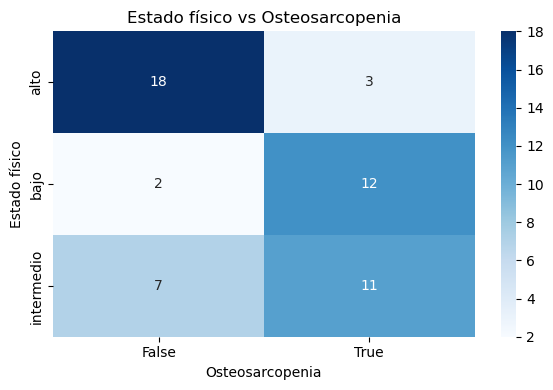

In [13]:
tabla = pd.crosstab(df['clasificacion_de_estado_fisico'], df['osteosarcopenia'])

print("Tabla de contingencia:")
print(tabla)

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.4f}")
print(f"\np-valor: {p:.4f}")
print(f"\nGrados de libertad{dof}")
print(f"\nFrecuencias esperadas:")
print(pd.DataFrame(expected, index=tabla.index, columns=tabla.columns))

plt.figure(figsize=(6,4))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues")
plt.title("Estado físico vs Osteosarcopenia")
plt.xlabel("Osteosarcopenia")
plt.ylabel("Estado físico")
plt.tight_layout()
plt.show()

## Objetivo 4. IMC y % de grasa corporal vs osteosarcopenia

**Definición del objetivo:** Evaluar si existen diferencias estadísticamente significativas en el IMC y en el porcentaje de grasa corporal entre pacientes con y sin osteosarcopenia.

**Variables:**  
- `osteosarcopenia`: binaria (sí/no).
- `porcentaje_de_grasa_corporal`: continua.
- `imc_clasificacion`: orginal/categórica (adecuado, sobrepeso, obesidad 1, 2, 3).

**Pruebas a aplicar:**  
1. Para el porcentaje de grasa corporal:
   - Prueba de normalidad (Shapiro-Wilk).
   - Si aplica: t-test o Mann-Whitney U.
   - Boxplot de comparación entre grupos.
2. Para clasificación del IMC:
   - Tabla de contingencia entre `imc_clasificacion` y `osteosarcopenia`
   - Prueba chi-cuadrado.
   - Gráfico de barras.

In [14]:
# se utilizarán los mismos grupos previamente definidos.
# Normalidad
print("Shapiro-Wilk (con osteosarcopenia):", shapiro(grupo1))
print("Shapiro-Wilk (sin osteosarcopenia):", shapiro(grupo2))

# Pruebas estadísticas
print("\nt-test:")
print(ttest_ind(grupo1, grupo2, equal_var=True))  # si procede
print("Mann-Whitney U:")
print(mannwhitneyu(grupo1, grupo2, alternative='two-sided'))

# Asociación entre clasificación de IMC y osteosarcopenia
tabla_imc = pd.crosstab(df['clas_imc'], df['osteosarcopenia'])
print("\nTabla de contingencia IMC vs Osteosarcopenia:")
print(tabla_imc)

chi2, p, dof, expected = chi2_contingency(tabla_imc)
print(f"\nChi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")

Shapiro-Wilk (con osteosarcopenia): ShapiroResult(statistic=0.9366746934686153, pvalue=0.11184288620067676)
Shapiro-Wilk (sin osteosarcopenia): ShapiroResult(statistic=0.9507731594837765, pvalue=0.22384547892854906)

t-test:
TtestResult(statistic=1.584118297407966, pvalue=0.11934885363544999, df=51.0)
Mann-Whitney U:
MannwhitneyuResult(statistic=443.5, pvalue=0.10100324881111432)

Tabla de contingencia IMC vs Osteosarcopenia:
osteosarcopenia  False  True 
clas_imc                     
adecuado             2      2
obesidad 1           7      7
obesidad 2           3      5
obesidad 3           1      4
sobrepeso           14      8

Chi-cuadrado: 3.9189
p-valor: 0.4171
Grados de libertad: 4


## Objetivo 6. SPPB vs osteosarcopenia.

**Definición:** Evaluar si existe una relación estadísticamente significativa entre el nivel funcioanl según la prueba SPPB (clasificado en categorías: mínima, leve, moderada, grave) y la presencia o ausencia de osteosarcopenia.  

**Variables:**
- `sppb_categoria`: categórica ordinal (mínima, leve, moderada, grave).
- `osteosarcopenia`: binaria (si/no)

**Prueba:**
- Chi-cuadrado de independencia para evaluar la asociación entre ambas variables.

In [15]:
# Tabla de contingencia
tabla_sppb = pd.crosstab(df['sppb_categoria'], df['osteosarcopenia'])

# Mostrar tabla
print("Tabla de contingencia (SPPB vs osteosarcopenia):")
print(tabla_sppb)

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_sppb)

print(f"\nChi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")

# Frecuencias esperadas
print("\nFrecuencias esperadas:")
print(pd.DataFrame(expected, index=tabla_sppb.index, columns=tabla_sppb.columns))

Tabla de contingencia (SPPB vs osteosarcopenia):
osteosarcopenia  False  True 
sppb_categoria               
Grave                1      5
Leve                 6      9
Moderada             2      9
Mínima              18      3

Chi-cuadrado: 18.4232
p-valor: 0.0004
Grados de libertad: 3

Frecuencias esperadas:
osteosarcopenia      False      True 
sppb_categoria                       
Grave             3.056604   2.943396
Leve              7.641509   7.358491
Moderada          5.603774   5.396226
Mínima           10.698113  10.301887


## Objetivo 7. Masa muscular vs nivel de sarcopenia

**Definición:** Evaluar si existen diferencias estadísticamente significativas en la masa muscular absoluta entre entre los distintos niveles de sarcopenia. En el análisis exploratorio se observaron medianas distintas, pero no un patrón lineal claro.

**Variables:**
- `masa_muscular_absoluta`: continua (kg)
- `nivel_de_sarcopenia`: categórica ordinal (sin, leve, moderada, severa)

**Pruebas:**
1. Prubea de normalidad por grupo (Shapiro-Wilk).
2. Si los datos no son normales: Kruskal-wallis para comparar varios grupos independientes.

Shapiro-Wilk para grupo 'sin sarcopenia': ShapiroResult(statistic=0.8528924227947864, pvalue=0.0013147810075981408)
Shapiro-Wilk para grupo 'sarcopenia moderada': ShapiroResult(statistic=0.9412178246504291, pvalue=0.47286475802468547)
Shapiro-Wilk para grupo 'sarcopenia severa': ShapiroResult(statistic=0.9611795223147671, pvalue=0.7863297638175298)
Shapiro-Wilk para grupo 'sarcopenia leve': ShapiroResult(statistic=0.9360227246965093, pvalue=0.5407102519696306)


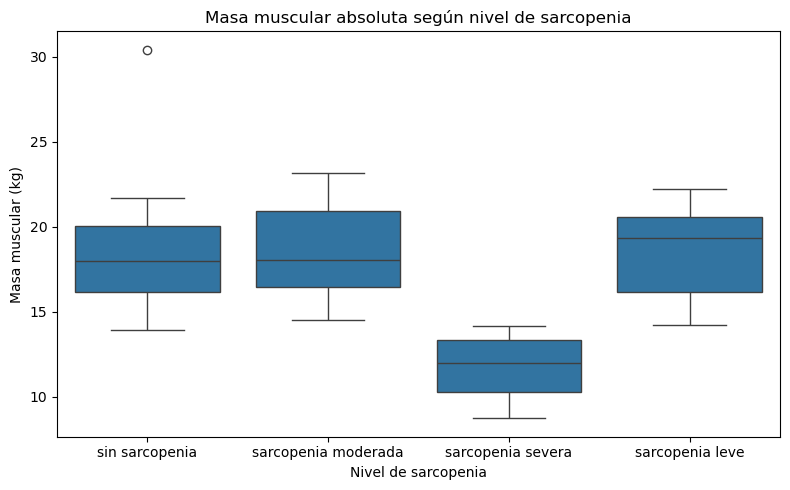

Kruskal-Wallis:
KruskalResult(statistic=11.071190611649424, pvalue=0.011347084114138366)


In [16]:
# Normalidad por grupo
for nivel in df['nivel_de_sarcopenia'].unique():
    grupo = df[df['nivel_de_sarcopenia'] == nivel]['masa_muscular_absoluta']
    print(f"Shapiro-Wilk para grupo '{nivel}':", shapiro(grupo))

# Viz
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='nivel_de_sarcopenia', y='masa_muscular_absoluta')
plt.title('Masa muscular absoluta según nivel de sarcopenia')
plt.xlabel('Nivel de sarcopenia')
plt.ylabel('Masa muscular (kg)')
plt.tight_layout()
plt.show()

# Kruskal-Wallis
grupos = [grupo['masa_muscular_absoluta'].values for _, grupo in df.groupby('nivel_de_sarcopenia')]
print("Kruskal-Wallis:")
print(kruskal(*grupos))

## Objetivo 11. Escalas funcionales (Katz y Lawton) vs osteosarcopenia.

**Definición:** Evaluar si existen diferencias estadísticamente significativas en las puntuaciones de las escalas de funcionalidad Katz y Lawton entre pacientes con y sin osteosarcopenia. En el análisis exploratorio, la escala Lawton mostró mayor dispersión en el grupo con la condición, mientras que la escala Katz presentó un efecto techo.

**Variables:**  
- `puntaje_de_katz`: continua discreta (rango 0 - 6).
- `resultado_de_lawton`: continua discreta (rango 0 - 8).

**Pruebas:**
- Mann-Whitney U para comparar las distribuciones de cada escala entre los dos grupos.

Katz - Mann-Whitney U: MannwhitneyuResult(statistic=296.0, pvalue=0.0775945578565371)
Lawton - Mann-Whitney U: MannwhitneyuResult(statistic=215.0, pvalue=0.0029017619967044938)


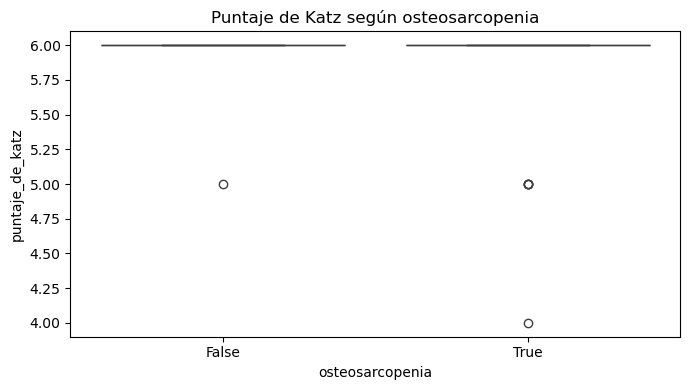

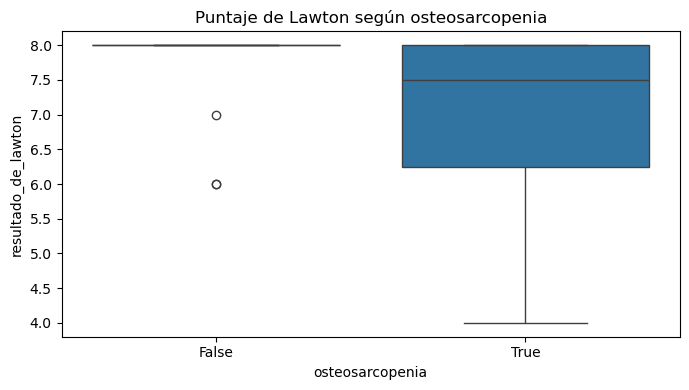

In [19]:
katz_con = df[df['osteosarcopenia'] == True]['puntaje_de_katz']
katz_sin = df[df['osteosarcopenia'] == False]['puntaje_de_katz']

lawton_con = df[df['osteosarcopenia'] == True]['resultado_de_lawton']
lawton_sin = df[df['osteosarcopenia'] == False]['resultado_de_lawton']

# Prueba Mann-Whitney U:
print("Katz - Mann-Whitney U:", mannwhitneyu(katz_con, katz_sin, alternative='two-sided'))
print("Lawton - Mann-Whitney U:", mannwhitneyu(lawton_con, lawton_sin, alternative='two-sided'))

# Visualización Katz
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='osteosarcopenia', y='puntaje_de_katz')
plt.title('Puntaje de Katz según osteosarcopenia')
plt.tight_layout()
plt.show()

# Visualización Lawton
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='osteosarcopenia', y='resultado_de_lawton')
plt.title('Puntaje de Lawton según osteosarcopenia')
plt.tight_layout()
plt.show()

## Objetivo 12. Relación entre tiempo de ejercicio y presencia de sarcopenia u osteoporosis.

**Definición:** Evaluar si existe una asociación estadísticamente significativa entre los niveles de actvidiad física reportados (tiempo de ejercicio) y la presencia de: sarcopenia y osteoporosis.

**Variables involucradas:**
- `tiempo_de_ejercicio`: ordinal (no, 30-60, 61-121, 121-180, más de 180 min)
- `sarcopenia`: binaria (sí/no)
- `clasificacion_de_densidad_mineral`: categórica (osteopenia/osteoporosis)

**Pruebas**  
- Chi-cuadrado de independencia:
  - Entre `tiempo_de_ejercicio` y presencia de sarcopenia.
  - Entre `tiempo_de_ejercicio` y presencia de osteoporosis.

> Ya que los objetivos fueron tratados como separados en el EDA, haremos dos pruebas independientes.

In [20]:
df['tiene_sarcopenia'] = df['sarcopenia'] != "sin sarcopenia"
df['tiene_osteoporosis'] = df['clasificacion_de_densidad_mineral'] == "osteoporosis"

In [21]:
# sarcopenia vs ejercicio
tabla_sarcopenia = pd.crosstab(df['tiempo_de_ejercicio'], df['tiene_sarcopenia'])
print("Tabla de contingencia: ejercicio vs sarcopenia")
print(tabla_sarcopenia)

chi2_1, p_1, dof_1, expected_1 = chi2_contingency(tabla_sarcopenia)
print(f"\nChi-cuadrado: {chi2_1:.4f}")
print(f"p-valor: {p_1:.4f}")
print(f"Grados de libertad: {dof_1}")

# Osteoporosis vs ejercicio
tabla_osteoporosis = pd.crosstab(df['tiempo_de_ejercicio'], df['tiene_osteoporosis'])
print("\nTabla de contingencia: ejercicio vs osteoporosis")
print(tabla_osteoporosis)

chi2_2, p_2, dof_2, expected_2 = chi2_contingency(tabla_osteoporosis)
print(f"\nChi-cuadrado: {chi2_2:.4f}")
print(f"p-valor: {p_2:.4f}")
print(f"Grados de libertad: {dof_2}")

Tabla de contingencia: ejercicio vs sarcopenia
tiene_sarcopenia     True
tiempo_de_ejercicio      
121 - 180 mins          9
30 - 60 mins            4
61 - 120 mins           3
mas de 180 mins         8
no                     29

Chi-cuadrado: 0.0000
p-valor: 1.0000
Grados de libertad: 0

Tabla de contingencia: ejercicio vs osteoporosis
tiene_osteoporosis   False  True 
tiempo_de_ejercicio              
121 - 180 mins           6      3
30 - 60 mins             3      1
61 - 120 mins            3      0
mas de 180 mins          5      3
no                      18     11

Chi-cuadrado: 1.9360
p-valor: 0.7475
Grados de libertad: 4


## Objetivo 13. Medicamentos vs osteosarcopenia

**Definición:** Evaluar si existe una asociación estadísticamente significateiva entre el uso de tres grupos de medicamentos: Antidiabéticos, Antihipertensivos, Ansiolíticos o hipnóticos; y la presencia de osteosarcopenia.

**Variables:**
- `usa_antidiabeticos`: booleana.
- `usa_antihipertensivos`: boolena.
- `osteosarcopenia`: boolena.

**Prueba:**  
Chi-cuadrado de independencia para cada medicamento por separado.

In [25]:
# Lista de medicamentos a analizar:
meds = ['usa_antidiabeticos', 'usa_antihipertensivos', 'usa_ansioliticos']

for med in meds:
    print(f"\n--- {med.replace('_', ' ').title()} ---")
    tabla = pd.crosstab(df[med], df['osteosarcopenia'])
    print("Tabla de contingencia:")
    print(tabla)

    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"Chi-cuadrado: {chi2:.4f}")
    print(f"p-valor: {p:.4f}")
    print(f"Grados de libertad: {dof}")


--- Usa Antidiabeticos ---
Tabla de contingencia:
osteosarcopenia     False  True 
usa_antidiabeticos              
False                  21     13
True                    6     13
Chi-cuadrado: 3.3182
p-valor: 0.0685
Grados de libertad: 1

--- Usa Antihipertensivos ---
Tabla de contingencia:
osteosarcopenia        False  True 
usa_antihipertensivos              
False                     15     16
True                      12     10
Chi-cuadrado: 0.0266
p-valor: 0.8705
Grados de libertad: 1

--- Usa Ansioliticos ---
Tabla de contingencia:
osteosarcopenia   False  True 
usa_ansioliticos              
False                25     23
True                  2      3
Chi-cuadrado: 0.0020
p-valor: 0.9646
Grados de libertad: 1


## Objetivo 14. Riesgo de fractura (FRAX) vs osteosarcopenia.

**Definición:** Evaluar si existen diferencias estadísticamente significativas en los indicadores de riesgo de fractura según el modelo FRAX entre pacientes con y sin osteosarcopenia. Se analizarán dos variables continuas:
- Probabilida de fracuta por fragilidad.
- Probabilidad de fractura de cadera.
Ambas fueron evaluadas de forma visual en el análisis exploratorio, sin encontrar diferencias concluyentes.

**Variables:**
- `probabilidad_de_fractura_por_fragilidad`: continua.
- `probabilidad_de_fractura_de_cadera`: continua.
- `osteosarcopenia`: booleana.

**Pruebas:**
- Shapiro-Wilk para normalidad por grupo.
- t-test si se cumple normalidad, o Mann-Whitney U si no.

Shapiro - Fractura fragilidad (con osteosarcopenia):  ShapiroResult(statistic=0.8763810464684059, pvalue=0.0048323043922653955)
Shapiro - Fractura fragilidad (con osteosarcopenia):  ShapiroResult(statistic=0.8025787922193246, pvalue=0.0001517434618267341)
Shapiro - Fractura cadera (con osteosarcopenia):  ShapiroResult(statistic=0.6594952130798954, pvalue=1.5505282573249292e-06)
Shapiro - Fractura cadera (con osteosarcopenia):  ShapiroResult(statistic=0.6595709405768633, pvalue=1.1140368193439196e-06)


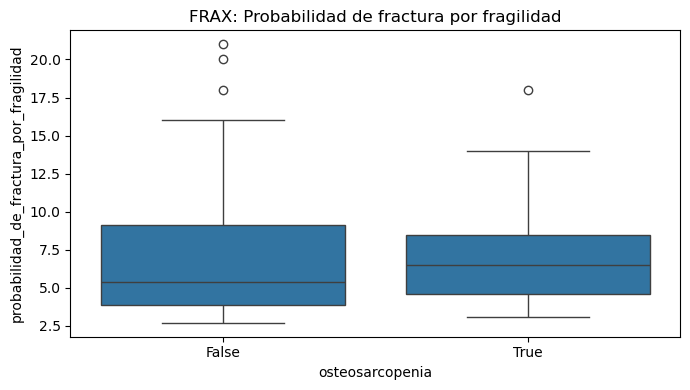

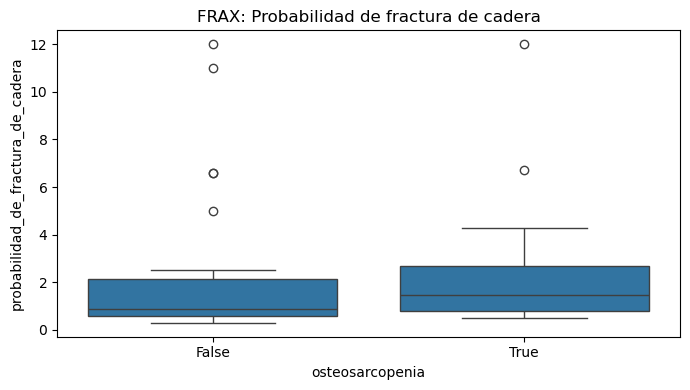


t-test FRAX fragilidad:
TtestResult(statistic=-0.4953540537738273, pvalue=0.6224779119950449, df=51.0)
Mann-Whitney FRAX fragilidad:
MannwhitneyuResult(statistic=374.5, pvalue=0.6822900296516653)

t-test FRAX cadera:
TtestResult(statistic=-0.23256577897759798, pvalue=0.8170293966951835, df=51.0)
Mann-Whitney FRAX cadera:
MannwhitneyuResult(statistic=406.0, pvalue=0.3313347319228266)


In [31]:
grupo1 = df[df['osteosarcopenia'] == True]
grupo2 = df[df['osteosarcopenia'] == False]

# Normalidad
print("Shapiro - Fractura fragilidad (con osteosarcopenia): ", shapiro(grupo1['probabilidad_de_fractura_por_fragilidad']))
print("Shapiro - Fractura fragilidad (con osteosarcopenia): ", shapiro(grupo2['probabilidad_de_fractura_por_fragilidad']))

print("Shapiro - Fractura cadera (con osteosarcopenia): ", shapiro(grupo1['probabilidad_de_fractura_de_cadera']))
print("Shapiro - Fractura cadera (con osteosarcopenia): ", shapiro(grupo2['probabilidad_de_fractura_de_cadera']))

# Viz
plt.figure(figsize=(7, 4))
sns.boxplot(x='osteosarcopenia', y='probabilidad_de_fractura_por_fragilidad', data=df)
plt.title("FRAX: Probabilidad de fractura por fragilidad")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x='osteosarcopenia', y='probabilidad_de_fractura_de_cadera', data=df)
plt.title("FRAX: Probabilidad de fractura de cadera")
plt.tight_layout()
plt.show()

# Pruebas estadísticas
print("\nt-test FRAX fragilidad:")
print(ttest_ind(grupo1['probabilidad_de_fractura_por_fragilidad'],
               grupo2['probabilidad_de_fractura_por_fragilidad'],
               equal_var=True))

print("Mann-Whitney FRAX fragilidad:")
print(mannwhitneyu(grupo1['probabilidad_de_fractura_por_fragilidad'],
               grupo2['probabilidad_de_fractura_por_fragilidad'],
               alternative='two-sided'))

print("\nt-test FRAX cadera:")
print(ttest_ind(grupo1['probabilidad_de_fractura_de_cadera'],
               grupo2['probabilidad_de_fractura_de_cadera'],
               equal_var=True))

print("Mann-Whitney FRAX cadera:")
print(mannwhitneyu(grupo1['probabilidad_de_fractura_de_cadera'],
               grupo2['probabilidad_de_fractura_de_cadera'],
               alternative='two-sided'))